In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
fifa = pd.read_csv("fifa_data19.csv")
fifa = fifa[["Name", "Club", "Age", "Overall", "Potential", "Nationality", "Preferred Foot", "Height", "Weight", "Position"]]
plt.style.use("default")
fifa.head(10)


,Name,Club,Age,Overall,Potential,Nationality,Preferred Foot,Height,Weight,Position
0,L. Messi,FC Barcelona,31,94,94,Argentina,Left,5'7,159lbs,RF
1,Cristiano Ronaldo,Juventus,33,94,94,Portugal,Right,6'2,183lbs,ST
2,Neymar Jr,Paris Saint-Germain,26,92,93,Brazil,Right,5'9,150lbs,LW
3,De Gea,Manchester United,27,91,93,Spain,Right,6'4,168lbs,GK
4,K. De Bruyne,Manchester City,27,91,92,Belgium,Right,5'11,154lbs,RCM
5,E. Hazard,Chelsea,27,91,91,Belgium,Right,5'8,163lbs,LF
6,L. Modrić,Real Madrid,32,91,91,Croatia,Right,5'8,146lbs,RCM
7,L. Suárez,FC Barcelona,31,91,91,Uruguay,Right,6'0,190lbs,RS
8,Sergio Ramos,Real Madrid,32,91,91,Spain,Right,6'0,181lbs,RCB
9,J. Oblak,Atlético Madrid,25,90,93,Slovenia,Right,6'2,192lbs,GK


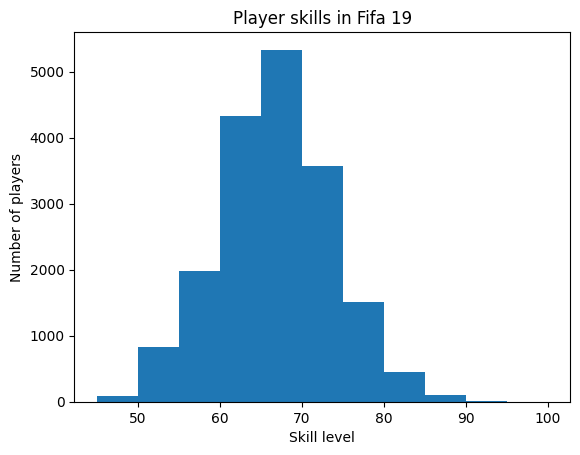

In [14]:
bins = [45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.hist(fifa.Overall, bins=bins)

plt.title("Player skills in Fifa 19")
plt.ylabel("Number of players")
plt.xlabel("Skill level")
plt.show()

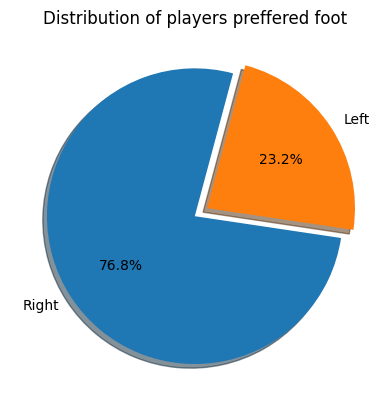

In [4]:
right = fifa.loc[fifa["Preferred Foot"] == "Right"].count()[0]
left = fifa.loc[fifa["Preferred Foot"] == "Left"].count()[0]
lables = ["Right", "Left"]
explode = [0, 0.1]
plt.title("Distribution of players preffered foot")

plt.pie([right, left], labels=lables, shadow=True, autopct='%1.1f%%', startangle=75, explode=explode)
plt.show()

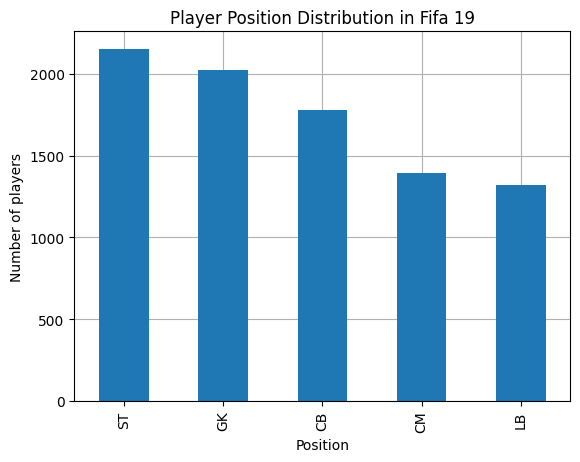

In [5]:
pos = fifa["Position"].value_counts(ascending=False).head(5)
ax2 = pos.plot(kind="bar", grid=True)
ax2.set_axisbelow(True)

plt.title("Player Position Distribution in Fifa 19")
plt.ylabel("Number of players")
plt.xlabel("Position")

plt.show()
#fifa.Position.unique()
# Output array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
#        'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
#        'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)
#RF = Right Forward
#ST = Striker
#LW = The Wings (LEFT)
#GK = Goalkeeper
#RCM = Right (off - center) Midfielder
#LF = Left Forward
#RS = Right Striker
#RCB = Right (off - center) back
#LCM = Left (off - center) midfielder
#CB = Center backa
#LDM = Left (off - center) Defensive Midfielder
#CAM = Central Attacking Midfielder
#CDM = Center (off - center) Defensive Midfielder
#LS = Left Striker
#LCB = Left (off - center) Back
#RM = Right Midfielder
#LAM = Left Attacking Midfielder
#LM = Left Midfielder
#LB = Left Back
#RDM = Right (off - center) Defensive Midfielder
#RW = The Wings (RIGHT)
#CM = Center Midfielder
#RB = Right Back
#RAM = Right Attacking Midfielder
#CF = Center Forward
#RWB = Right Wing Back
#LWB = Left Wing Back

##### SORTED #####
## Midfielder ##
#RM = Right Midfielder
#LM = Left Midfielder
#CM = Center Midfielder
#LCM = Left (off - center) midfielder
#RCM = Right (off - center) Midfielder

# ATTACKING MIDFILDER #
#LAM = Left Attacking Midfielder
#RAM = Right Attacking Midfielder
#CAM = Central Attacking Midfielder

# DEFINSIVE MIDFILDER #
#CDM = Center (off - center) Defensive Midfielder
#LDM = Left (off - center) Defensive Midfielder
#RDM = Right (off - center) Defensive Midfielder


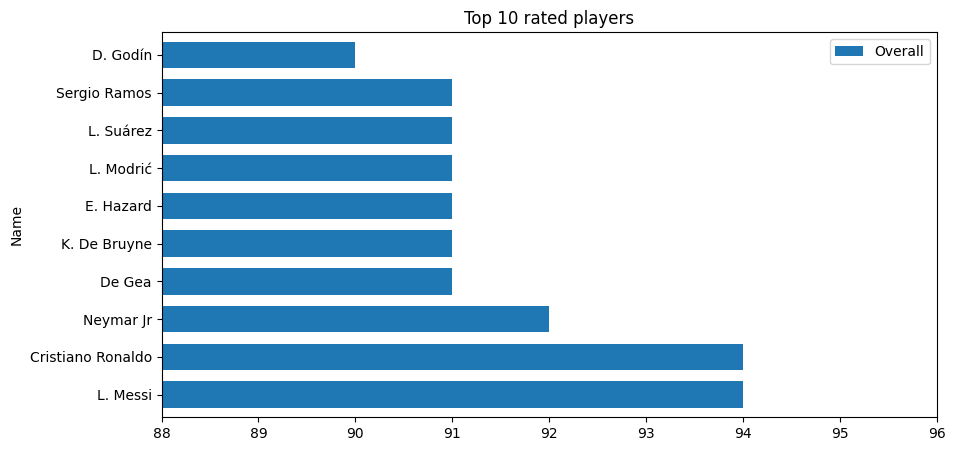

In [20]:
top_ten_players = fifa.sort_values("Overall", ascending=False).head(10)
ax = top_ten_players.plot(kind = "barh", x="Name", y="Overall", figsize=(10,5), width=.7)

plt.title("Top 10 rated players")
plt.xlim(88, 96)
plt.show()

In [25]:
df = top_ten_players[["Name", "Nationality", "Club"]]
display(df)


,Name,Nationality,Club
0,L. Messi,Argentina,FC Barcelona
1,Cristiano Ronaldo,Portugal,Juventus
2,Neymar Jr,Brazil,Paris Saint-Germain
3,De Gea,Spain,Manchester United
4,K. De Bruyne,Belgium,Manchester City
5,E. Hazard,Belgium,Chelsea
6,L. Modrić,Croatia,Real Madrid
7,L. Suárez,Uruguay,FC Barcelona
8,Sergio Ramos,Spain,Real Madrid
12,D. Godín,Uruguay,Atlético Madrid


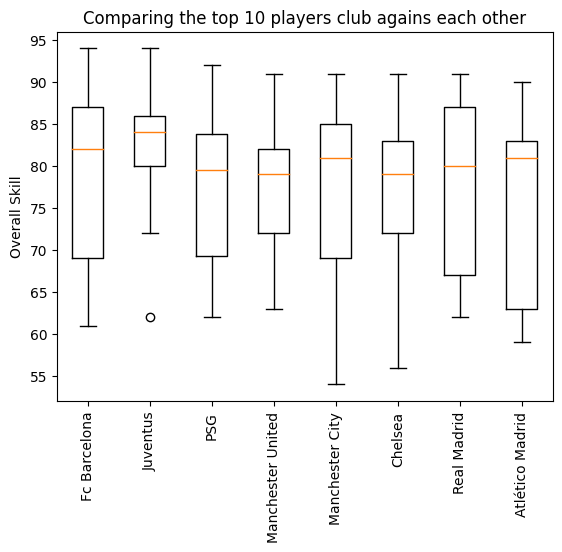

In [35]:
fc_barcelona = fifa.loc[fifa["Club"]== "FC Barcelona"]["Overall"]
juventus = fifa.loc[fifa["Club"] == "Juventus"]["Overall"]
psg = fifa.loc[fifa["Club"] == "Paris Saint-Germain"]["Overall"]
manchester_united = fifa.loc[fifa["Club"] == "Manchester United"]["Overall"]
manchester_city = fifa.loc[fifa["Club"] == "Manchester City"]["Overall"]
chelsea = fifa.loc[fifa["Club"] == "Chelsea"]["Overall"]
real_madrid = fifa.loc[fifa["Club"] == "Real Madrid"]["Overall"]
athletico_madrid = fifa.loc[fifa["Club"] == "Atlético Madrid"]["Overall"]

labels = ["Fc Barcelona", "Juventus", "PSG", "Manchester United", "Manchester City", "Chelsea", "Real Madrid", "Atlético Madrid"] 
plt.boxplot([fc_barcelona, juventus, psg, manchester_united, manchester_city, chelsea, real_madrid, athletico_madrid], labels=labels)
plt.xticks(rotation=90)
plt.title("Comparing the top 10 players club agains each other")
plt.ylabel("Overall Skill")

plt.show()

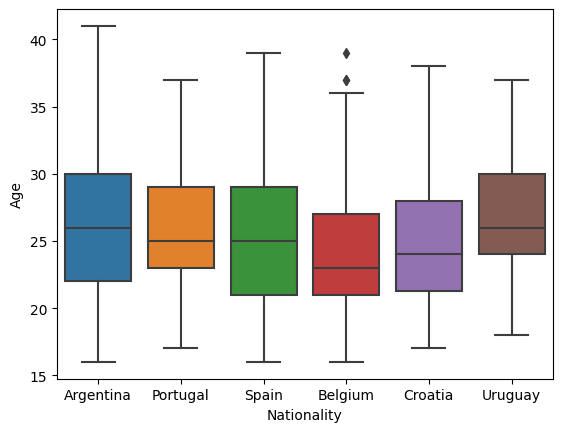

In [26]:
fifa = fifa[fifa['Nationality'].isin(["Argentina", "Portugal", "Spain", "Belgium", "Croatia", "Uruguay"])]
sns.boxplot(x = fifa["Nationality"], y = fifa["Age"])
plt.show()

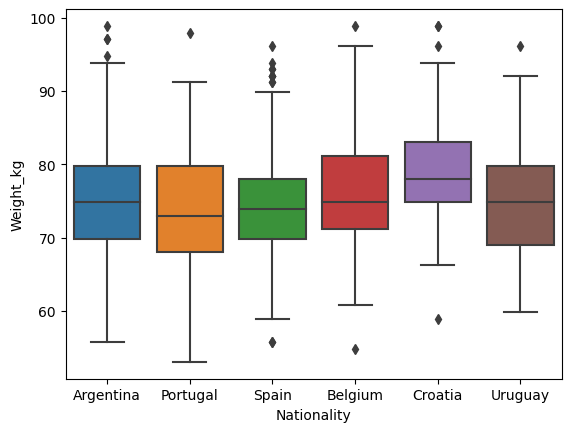

In [27]:
fifa["Weight_kg"] = fifa["Weight"].str[:3].astype(float)/2.20462

sns.boxplot(x = fifa["Nationality"], y = fifa["Weight_kg"])
plt.show()

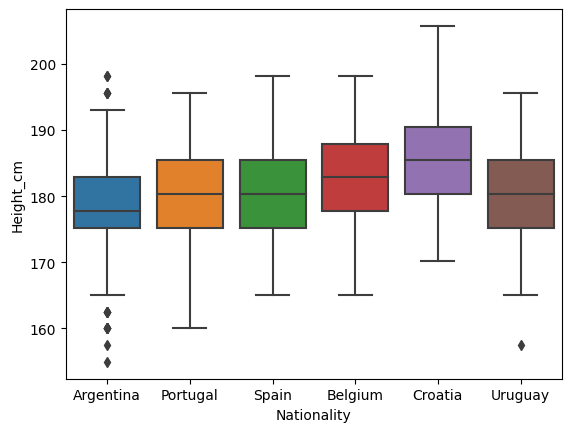

In [28]:
# Gör om från feet och inches till cm, tar det första värdet och gångar det med 12, tar sedan alla värden efter två tecken och gångar det med 2.54 sedan plussar jag på de värderna tillsammans, jag tar efter 2 tecken eftersom det är med en ' tex(5'42) 5 är på index 0 och allt efter ' är efter index 2
Height_cm = []
for j in list(fifa['Height'].values):
    try:
        Height_cm.append((float(str(j)[0])*12.0 + float(str(j)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
fifa['Height_cm'] = Height_cm

sns.boxplot(x = fifa["Nationality"], y = fifa["Height_cm"])
plt.show()


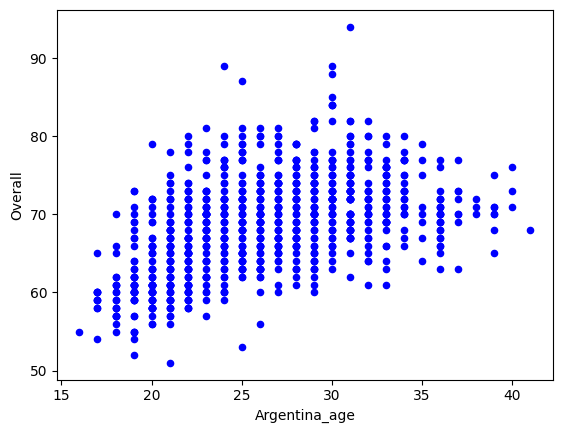

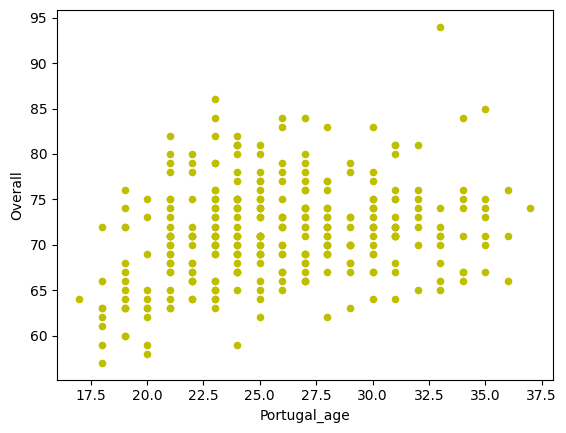

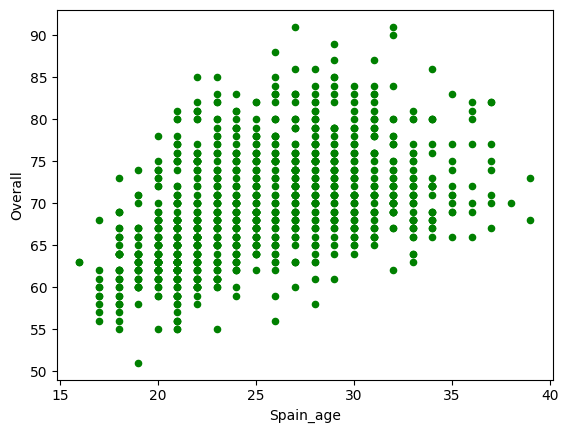

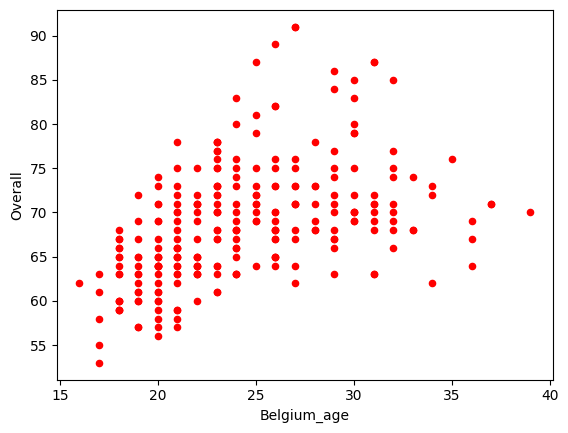

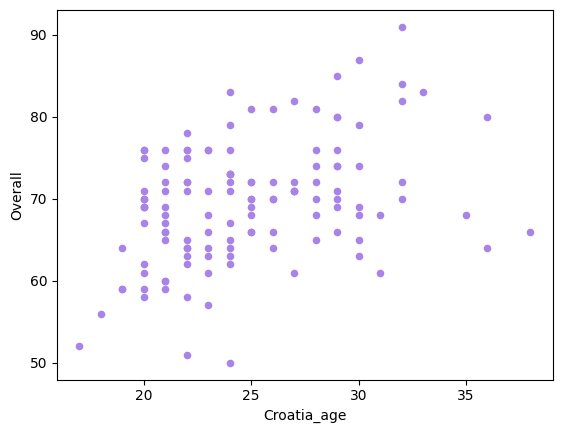

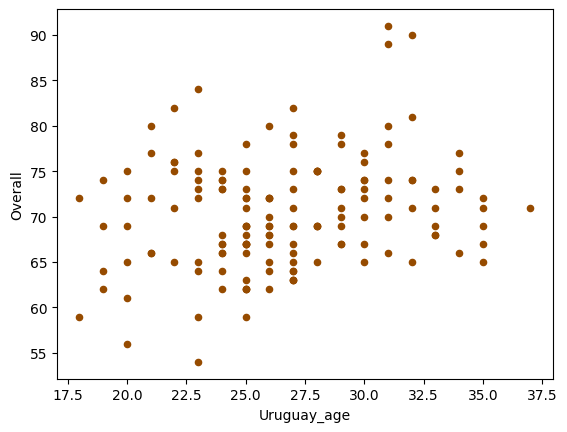

In [14]:
#"Argentina", "Portugal", "Spain", "Belgium", "Croatia", "Uruguay"
fifa["Argentina_age"] = fifa.loc[fifa.Nationality == "Argentina"]["Age"]
fifa["Portugal_age"] = fifa.loc[fifa.Nationality == "Portugal"]["Age"]
fifa["Spain_age"] = fifa.loc[fifa.Nationality == "Spain"]["Age"]
fifa["Belgium_age"] = fifa.loc[fifa.Nationality == "Belgium"]["Age"]
fifa["Croatia_age"] = fifa.loc[fifa.Nationality == "Croatia"]["Age"]
fifa["Uruguay_age"] = fifa.loc[fifa.Nationality == "Uruguay"]["Age"]

ax1 = fifa.plot(kind="scatter", x = "Argentina_age", y = "Overall", color = "b")
ax2 = fifa.plot(kind="scatter", x = "Portugal_age", y = "Overall", color = "y")
ax3 = fifa.plot(kind="scatter", x = "Spain_age", y = "Overall", color = "g")
ax4 = fifa.plot(kind="scatter", x = "Belgium_age", y = "Overall", color = "r")
ax5 = fifa.plot(kind="scatter", x = "Croatia_age", y = "Overall", color = "#a984e8")
ax6 = fifa.plot(kind="scatter", x = "Uruguay_age", y = "Overall", color = "#964B00")
plt.show()

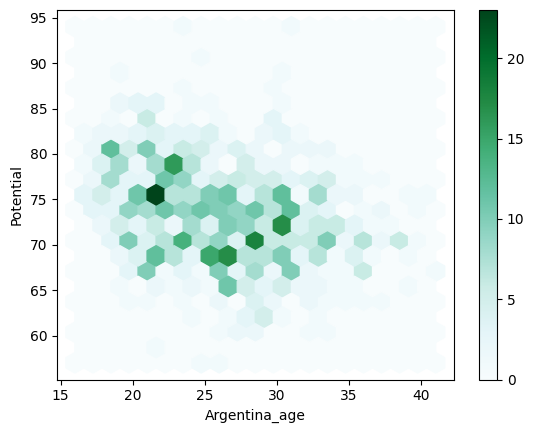

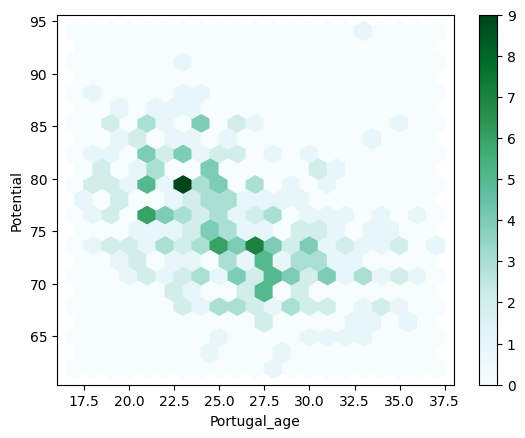

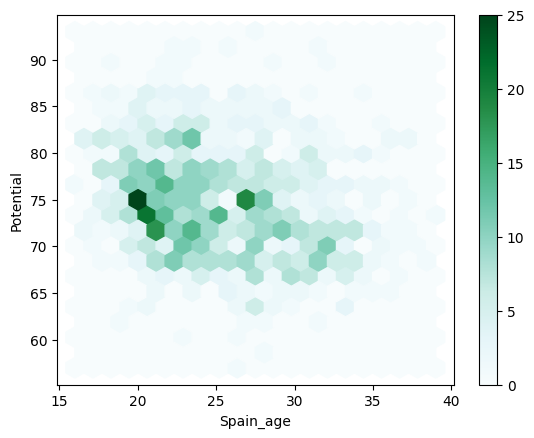

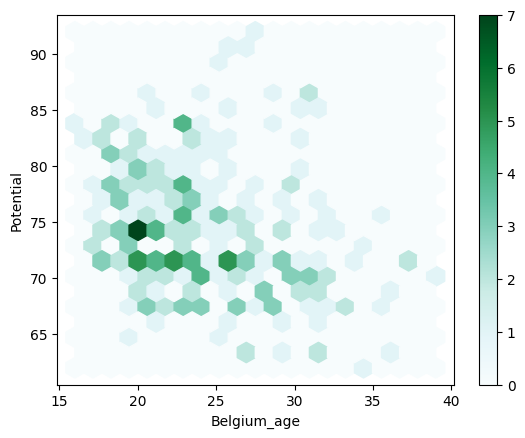

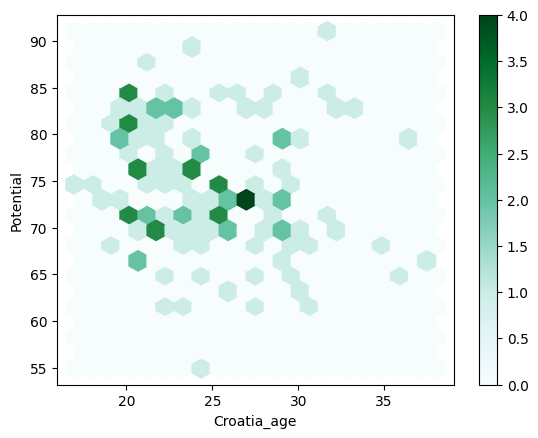

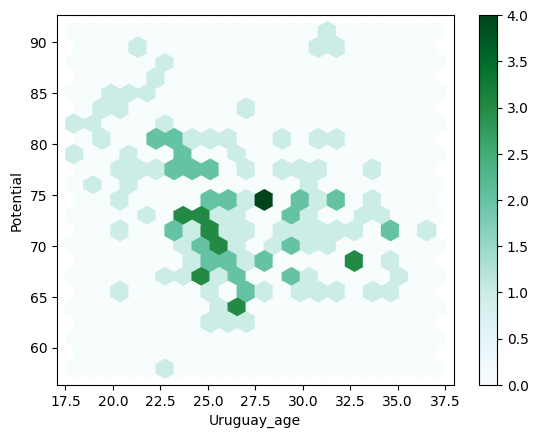

In [15]:
ax1 = fifa.plot(kind="hexbin", x="Argentina_age", y="Potential", gridsize=20)
ax2 = fifa.plot(kind="hexbin", x="Portugal_age", y="Potential", gridsize=20)
ax3 = fifa.plot(kind="hexbin", x="Spain_age", y="Potential", gridsize=20)
ax4 = fifa.plot(kind="hexbin", x="Belgium_age", y="Potential", gridsize=20)
ax5 = fifa.plot(kind="hexbin", x="Croatia_age", y="Potential", gridsize=20)
ax6 = fifa.plot(kind="hexbin", x="Uruguay_age", y="Potential", gridsize=20)

In [11]:
fifa.describe()

,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299
std,4.669943,6.908930,6.136496
min,16.000000,46.000000,48.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,45.000000,94.000000,95.000000
